In [59]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
model = HANCModelClass(name='baseline') # create an instance of the model

New budget constraint
\begin{align}
a_{t}+c_{t}=(1+r_{t})a_{t-1}+w_{t}(1-\tau_{t})z_{t}\geq0
\end{align}
New Government with budget constriant 
\begin{align}
B_{t+1}=(1+r_{t})B_{t}+G_{t}-\int\tau_{t}z_{t}d\boldsymbol{D}_{t}
\end{align}
Asset markets clearing
\begin{align}
K_{t}+B_{t}=\int a_{t}^{\ast}(z_{t},a_{t-1})d\boldsymbol{D}_{t}
\end{align}

For government budget to be balanced in each period we need $B_t=B_{t+1}$:
\begin{align}
B=(1+r_{t})B+G_{t}-\int\tau_{t}z_{t}d\boldsymbol{D}_{t} \\
\Leftrightarrow 0=r_{t}B_{t}+G_{t}-\tau_{t}\int z_{t}d\boldsymbol{D}_{t} \\
\Leftrightarrow \tau_{t}=\frac{1}{\int z_{t}d\boldsymbol{D}_{t} }\left(r_{t}B_{t}+G_{t}\right)
\end{align}
Which implies our $\tau$ in each period

In steady state the bonds will be:
\begin{align}
\Leftrightarrow B_{ss}=-\frac{1}{r_{t}} \left(G_{ss}-\tau_{ss}\int z_{t}d\boldsymbol{D}_{ss} \right) \\
\Leftrightarrow B_{ss}=\frac{1}{r_{t}} \left(\tau_{ss}\int z_{t}d\boldsymbol{D}_{ss} -G_{ss}\right) 
\end{align}


# Step 1: Find Steady state

In [61]:
model.find_ss(do_print=True)

household problem in ss solved in 0.2 secs [1916 iterations]
household problem in ss simulated in 2.3 secs [3057 iterations]

Implied K =  6.757
Implied Y =  1.562
Implied Gamma =  0.785
Implied delta =  0.073
Implied K/Y =  4.325
Implied B =  2.000
Discrepancy in K+B-A_hh =   0.00000000
Discrepancy in C-C_hh =   0.00000000


In [67]:
# unpack
par = model.par
ss = model.ss
path = model.path
sim = model.sim

## Tests

note: inputs = steady state value -> expected: constant value (straigt line)

household z z simulated along transition in 0.8 secs



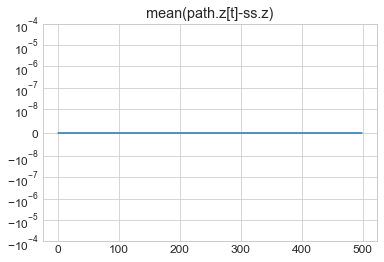

In [68]:
model.test_hh_z_path()

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.1 secs
household problem simulated along transition in 1.3 secs



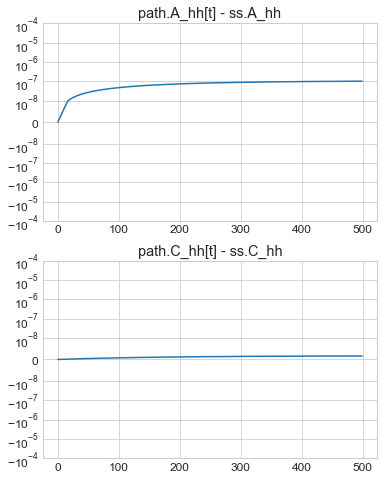

In [69]:
model.test_hh_path()

In [70]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
C              : t0 =  0.0e+00, max abs.  0.0e+00
Gamma          : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 =  0.0e+00, max abs.  0.0e+00
r              : t0 = -5.2e-18, max abs.  5.2e-18
rk             : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  2.2e-16, max abs.  2.2e-16
Y              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
tau            : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
A_hh           : t0 =  0.0e+00, max abs.  1.0e-07
C_hh           : t0 =  0.0e+00, max abs.  1.6e-09

absolute value (potential targets):
clearing_A     : t0 =  0.0e+00, max abs.  1.0e-07
clearing_C     : t0 =  6.4e-10, max abs.  1.0e-09


note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 0.4 secs]
finding Jacobian wrt. r              : 0 125 250 375 [computed in 0.4 secs]
finding Jacobian wrt. tau            : 0 125 250 375 [computed in 0.5 secs]
finding Jacobian wrt. w              : 0 125 250 375 [computed in 0.5 secs]
household Jacobian computed in 1.9 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 0.2 secs
curly_Y and curly_D calculated for tau             in 0.2 secs
curly_Y and curly_D calculated for w               in 0.1 secs
curly_E calculated in 0.1 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 0.7 secs

A_hh:
 r              : cond = 5.8e+02 [mean =  4.5e+00]
 tau            : cond = 8.4e+01 [mean = -2.4e-02]
 w              : cond = 8.4e+01 [mean =  1.7e-02]

C_hh:
 r              : cond = 1.7e+02 [mean 

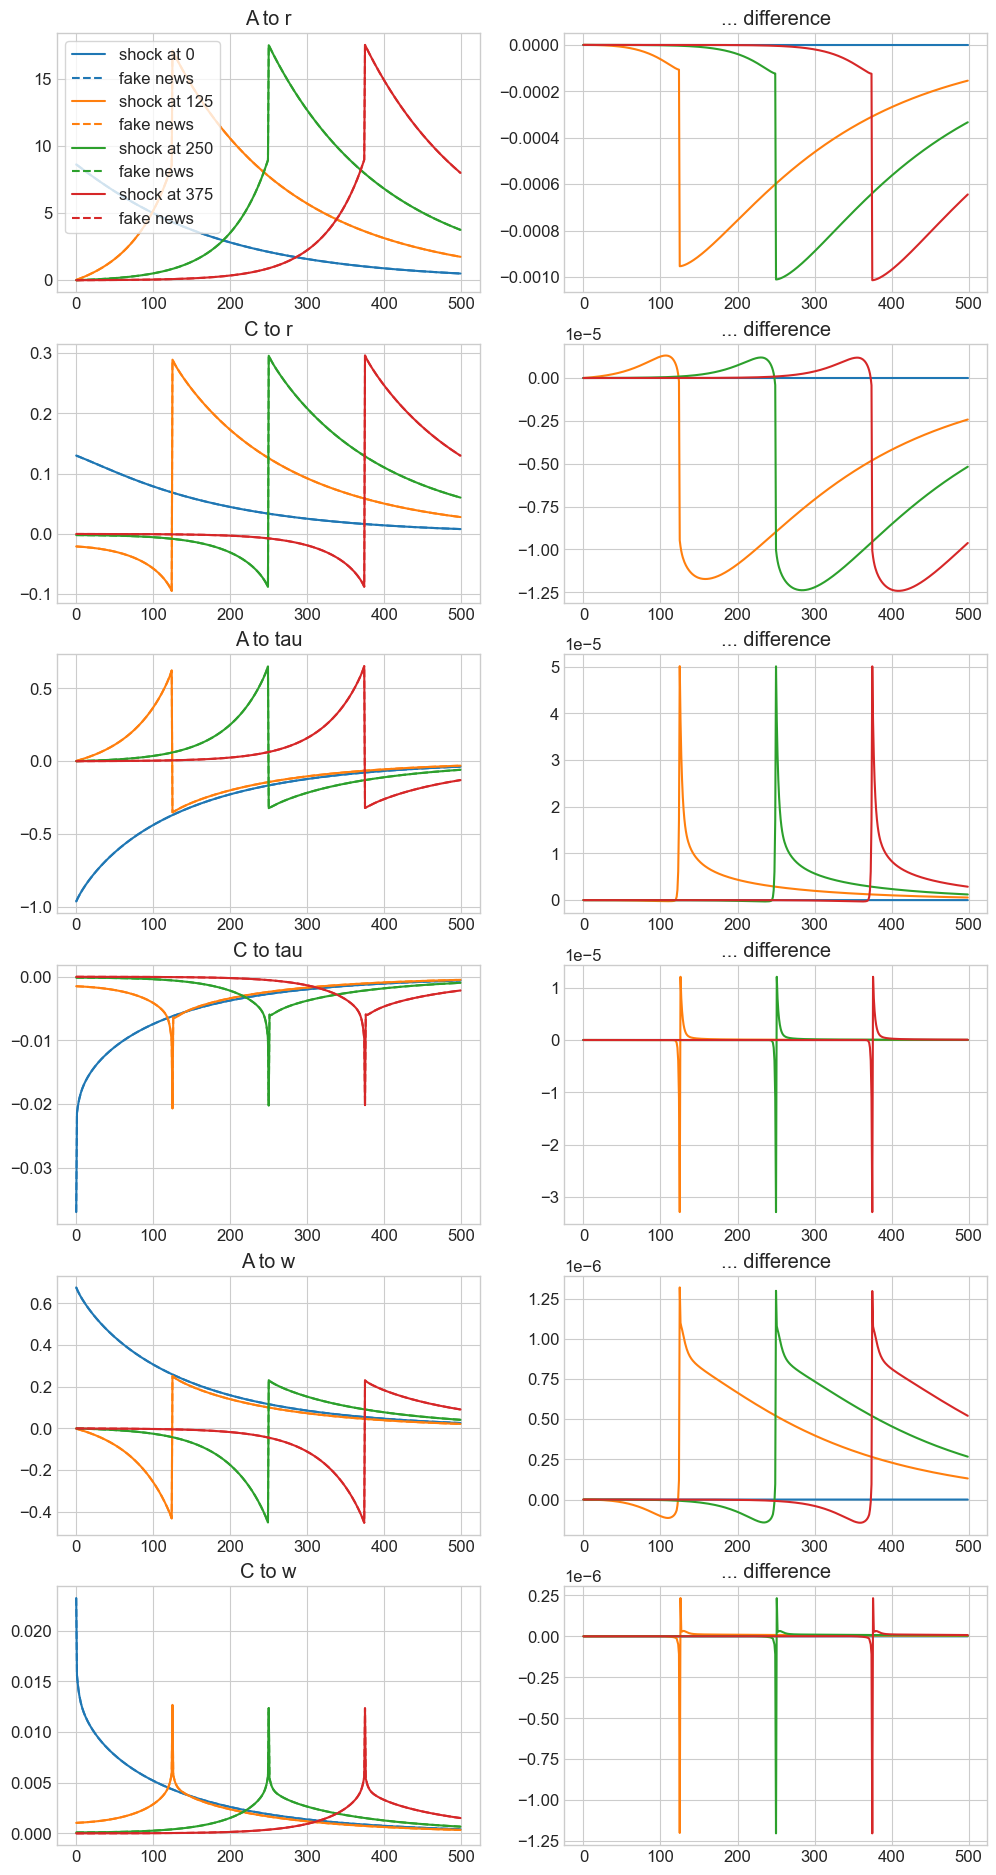

In [71]:
model.test_jacs()

In [72]:
model.ini.K

6.757248182194841

In [73]:
model.ini.G

0.28

In [74]:
model.path.G[0,2]

0.28

In [75]:
model.ss.G

0.28

In [76]:
model.path.K

array([[6.75724818, 6.75724818, 6.75724818, ..., 6.75724818, 6.75724818,
        6.75724818],
       [6.75724818, 6.75724818, 6.75724818, ..., 6.75724818, 6.75724818,
        6.75724818],
       [6.75724818, 6.75724818, 6.75724818, ..., 6.75724818, 6.75724818,
        6.75724818],
       ...,
       [6.75724818, 6.75724818, 6.75724818, ..., 6.75724818, 6.75724818,
        6.75724818],
       [6.75724818, 6.75724818, 6.75724818, ..., 6.75724818, 6.75724818,
        6.75724818],
       [6.75724818, 6.75724818, 6.75724818, ..., 6.75724818, 6.75724818,
        6.75724818]])

# Step 3a: Find non-linear transition_path

In [77]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 3.39e-02
 it =   1 -> max. abs. error = 7.48e-05
 it =   2 -> max. abs. error = 2.21e-07
 it =   3 -> max. abs. error = 3.04e-11

transition path found in 0.9 secs


In [78]:
diff = path.A_hh[0,:]-np.sum(path.a*path.D,axis=(1,2,3))
max_abs_diff = np.max(np.abs(diff))
print(f'{max_abs_diff = }')

max_abs_diff = 0.0


### shocks ###


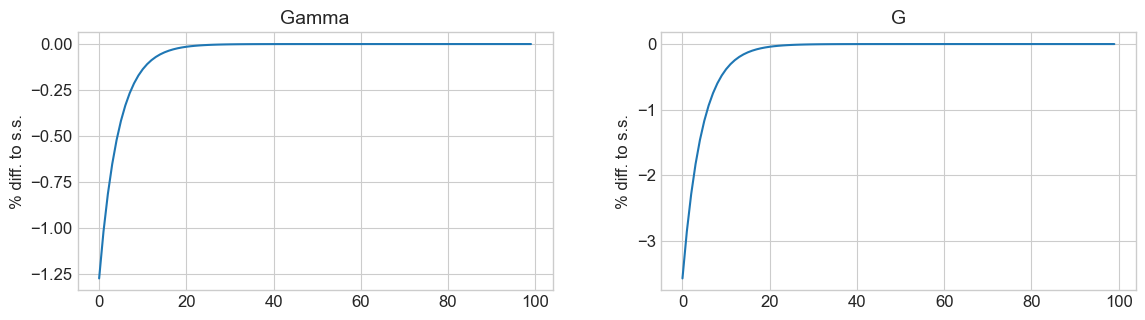


### varnames ###


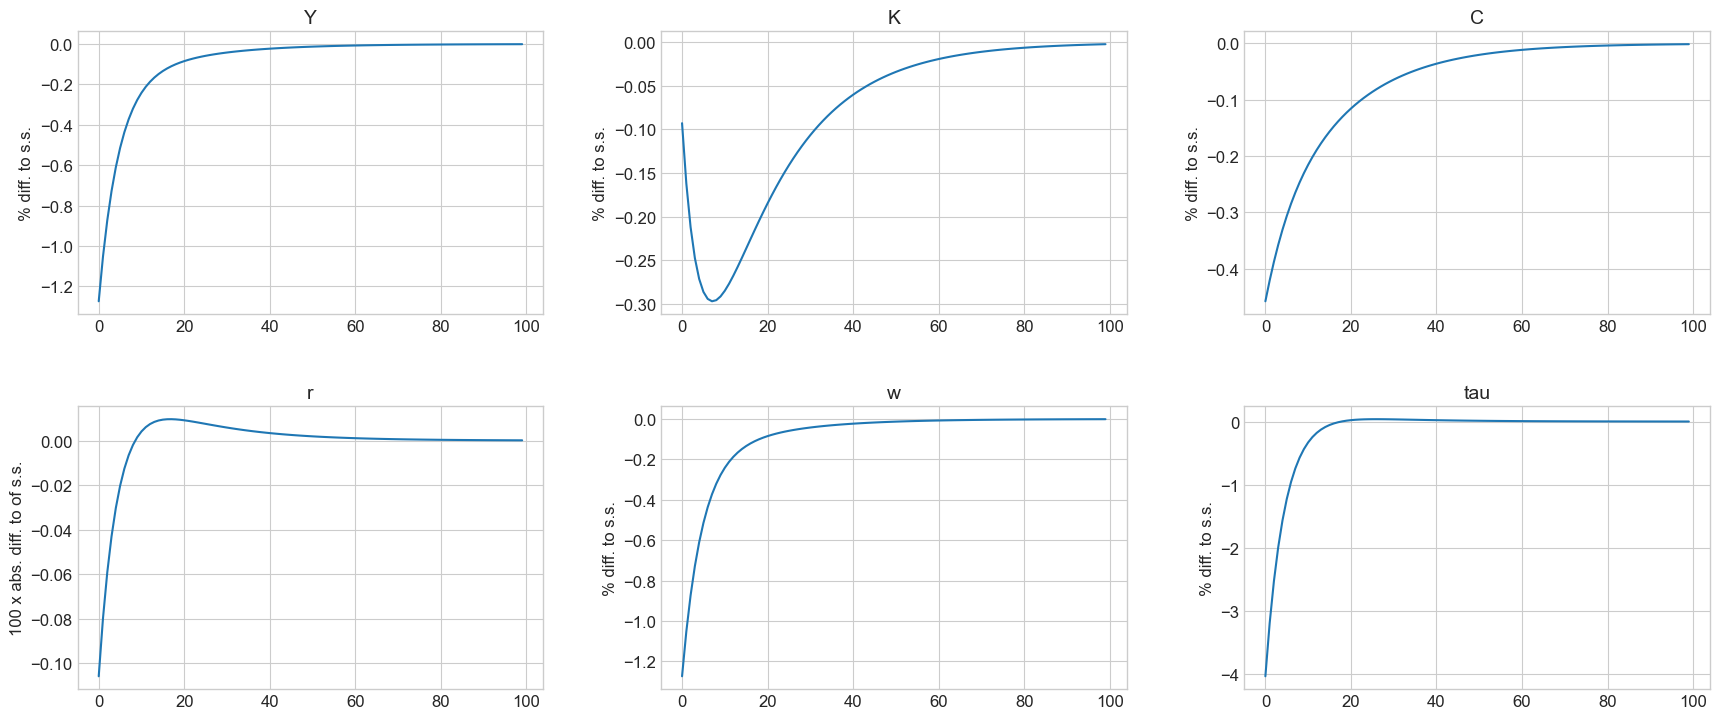


### tagets ###


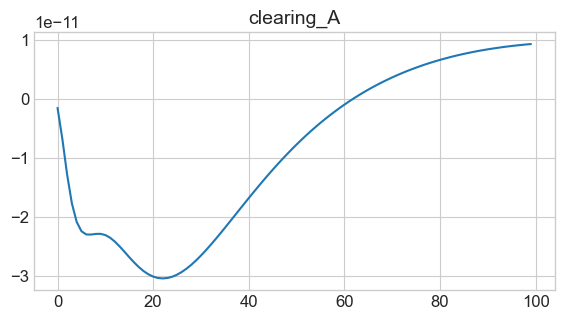

In [79]:
paths = ['Y','K','C','r','w','tau']
abs_diff = ['r','rk']
facs = {'r':100,'rk':100}
model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)

# Step 3b: Find linearized IRFs

In [45]:
model.find_IRFs(do_print=True,reuse_G_U=False)

linear transition path found in 0.0 secs [finding solution matrix: 0.0 secs]


### shocks ###


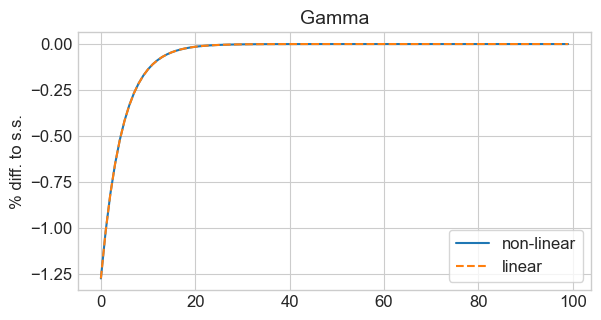


### varnames ###


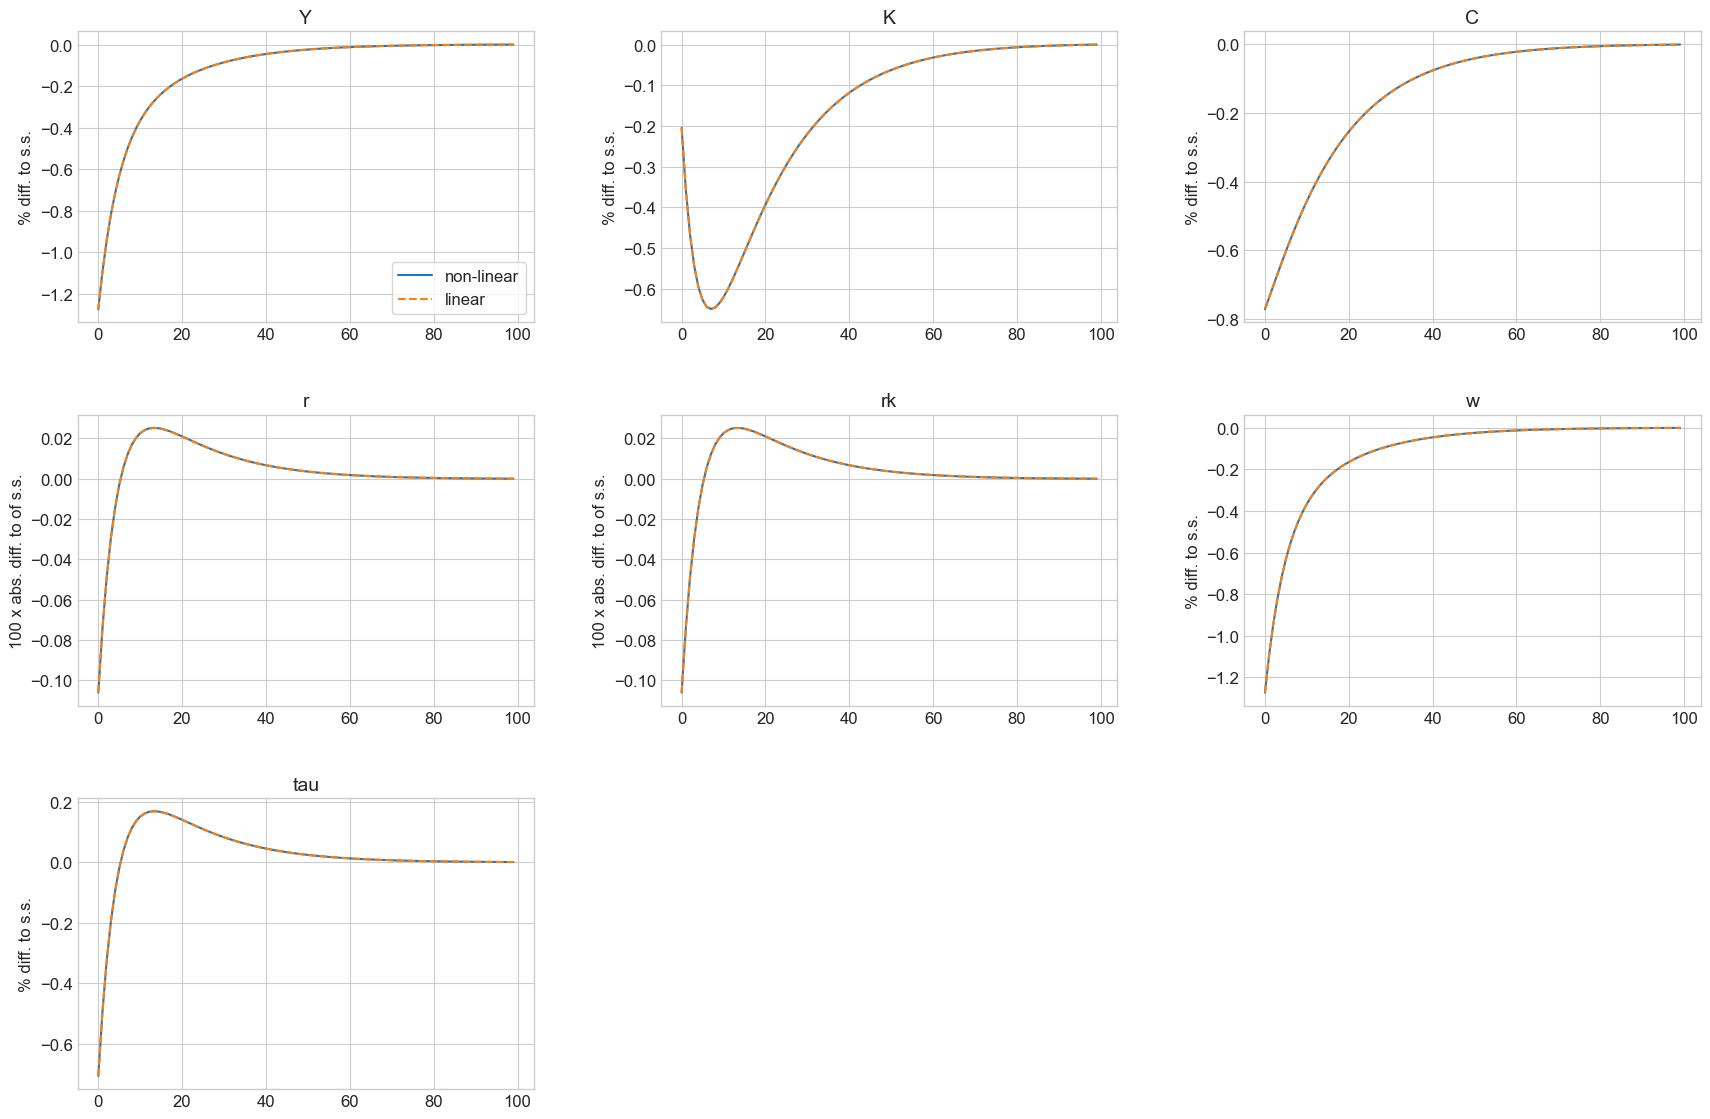


### tagets ###


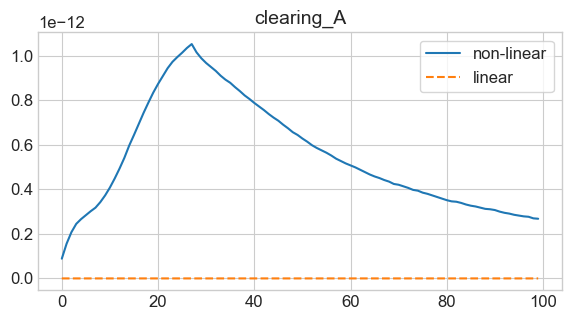

In [46]:
model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100,do_linear=True)

### Setting B<0

In [59]:
model_negB = HANCModelClass(name='Neg_B',par={'G':0.29,'tau_ss_target':0.3}) # create an instance of the model

In [60]:
model_negB.find_ss(do_print=True)

household problem in ss solved in 0.2 secs [1916 iterations]
household problem in ss simulated in 2.2 secs [3057 iterations]

Implied K =  7.757
Implied Y =  1.562
Implied Gamma =  0.747
Implied delta =  0.063
Implied K/Y =  4.965
Implied B =  1.000
Discrepancy in K+B-A_hh =   0.00000000
Discrepancy in C-C_hh =   0.00000000


In [61]:
model_negB.compute_jacs(do_print=True) # if skip_shocks = True the full Jacobians to shocks are  not computed

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 1.3 secs
curly_Y and curly_D calculated for tau             in 0.2 secs
curly_Y and curly_D calculated for w               in 0.2 secs
curly_E calculated in 0.2 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 1.9 secs

full Jacobians:
full Jacobian to unknowns computed in 4.0 secs [in evaluate_path(): 3.9 secs]
full Jacobian to shocks computed in 0.2 secs [in evaluate_path(): 0.1 secs]


In [62]:
model_negB.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 7.45e-02
 it =   1 -> max. abs. error = 1.42e-04
 it =   2 -> max. abs. error = 6.54e-07
 it =   3 -> max. abs. error = 6.00e-10
 it =   4 -> max. abs. error = 6.64e-13

transition path found in 2.2 secs


### shocks ###


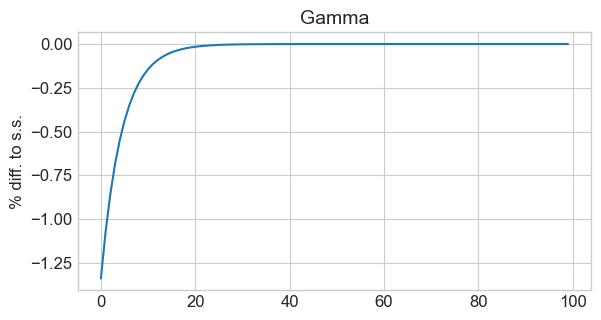


### varnames ###


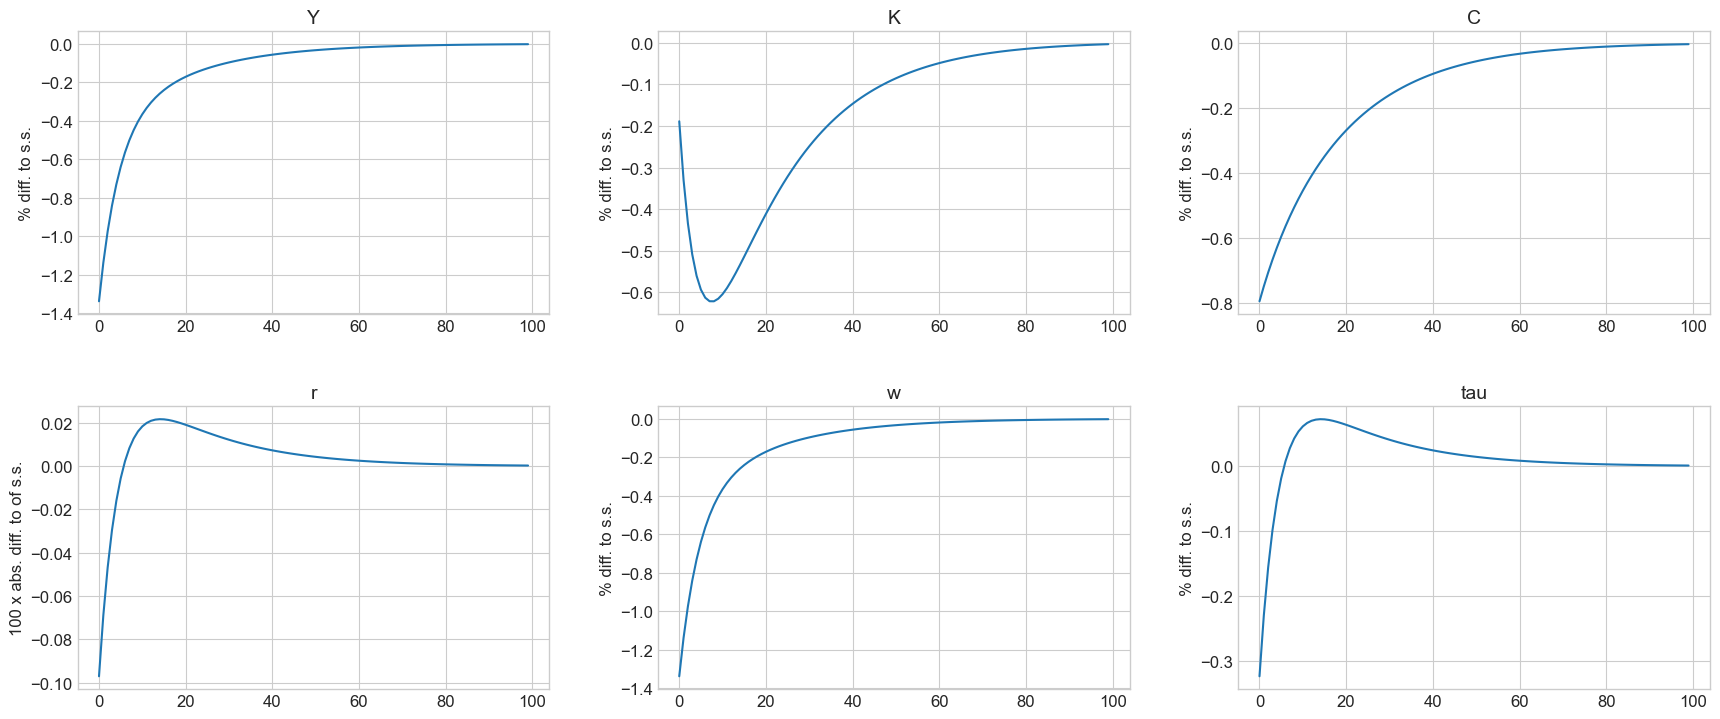


### tagets ###


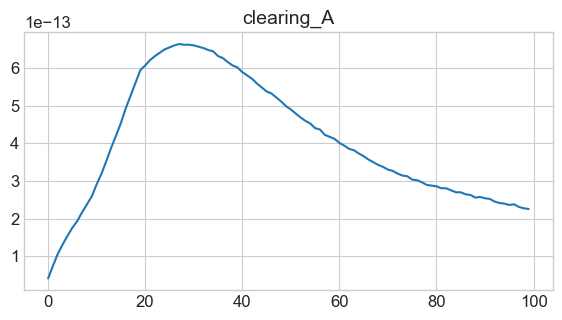

In [63]:
paths = ['Y','K','C','r','w','tau']
abs_diff = ['r','rk']
facs = {'r':100,'rk':100}
model_negB.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)

### Permanent shock in G

In [82]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
model = HANCModelClass(name='baseline', par={'jump_G':-0.01, 'jump_Gamma':0.0}) # create an instance of the model
# unpack
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [84]:
model.find_ss(do_print=True)

household problem in ss solved in 0.2 secs [1916 iterations]
household problem in ss simulated in 2.0 secs [3057 iterations]

Implied K =  6.757
Implied Y =  1.562
Implied Gamma =  0.785
Implied delta =  0.073
Implied K/Y =  4.325
Implied B =  2.000
Discrepancy in K+B-A_hh =   0.00000000
Discrepancy in C-C_hh =   0.00000000


In [85]:
model.compute_jacs(do_print=True) # if skip_shocks = True the full Jacobians to shocks are  not computed

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 1.2 secs
curly_Y and curly_D calculated for tau             in 0.1 secs
curly_Y and curly_D calculated for w               in 0.1 secs
curly_E calculated in 0.1 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 1.7 secs

full Jacobians:
full Jacobian to unknowns computed in 3.9 secs [in evaluate_path(): 3.8 secs]
full Jacobian to shocks computed in 0.4 secs [in evaluate_path(): 0.2 secs]


In [86]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 3.89e-02
 it =   1 -> max. abs. error = 3.77e-05
 it =   2 -> max. abs. error = 1.06e-07
 it =   3 -> max. abs. error = 1.14e-10
 it =   4 -> max. abs. error = 8.17e-14

transition path found in 2.5 secs


### shocks ###


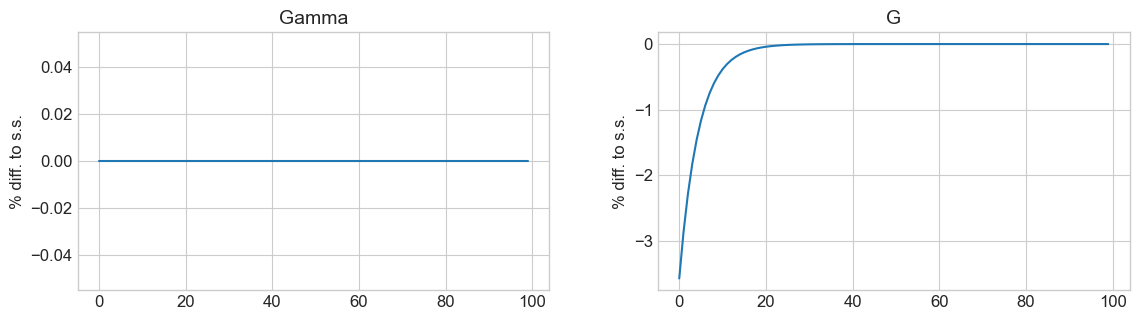


### varnames ###


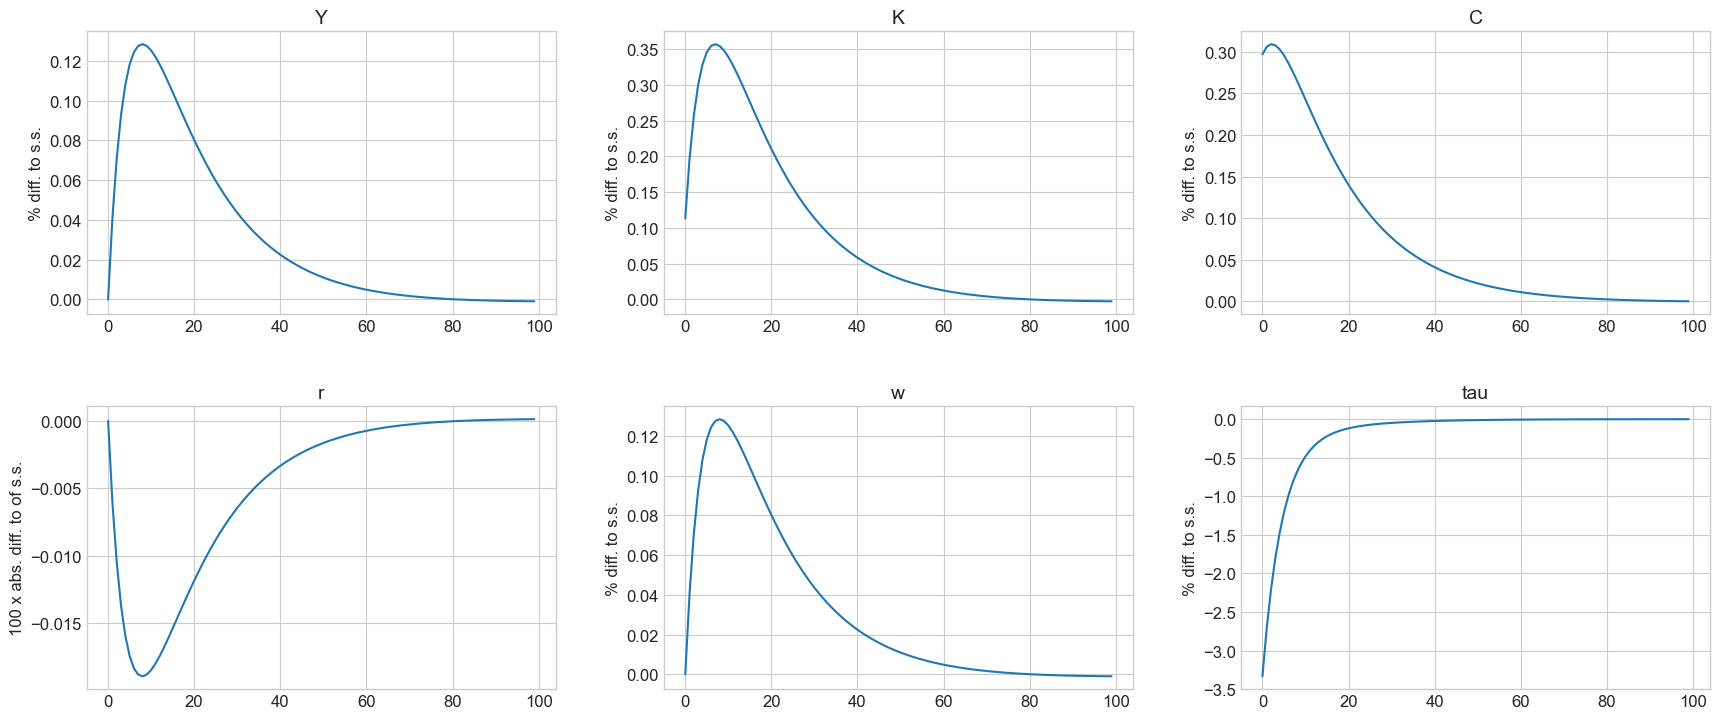


### tagets ###


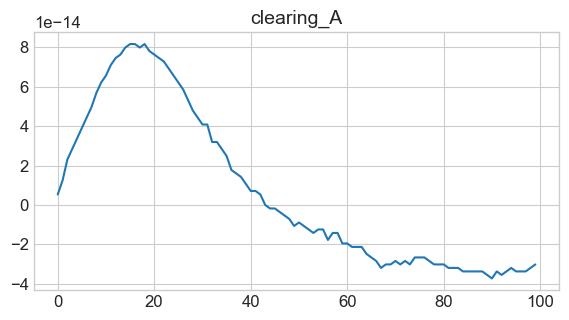

In [87]:
paths = ['Y','K','C','r','w','tau']
abs_diff = ['r','rk']
facs = {'r':100,'rk':100}
model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)

['r']
household problem solved along transition path in 0.1 secs
household problem simulated along transition in 0.0 secs

['w']
household problem solved along transition path in 0.1 secs
household problem simulated along transition in 0.0 secs

['tau']
household problem solved along transition path in 0.1 secs
household problem simulated along transition in 0.0 secs

None
household problem solved along transition path in 0.1 secs
household problem simulated along transition in 0.1 secs

all
household problem simulated along transition in 0.1 secs



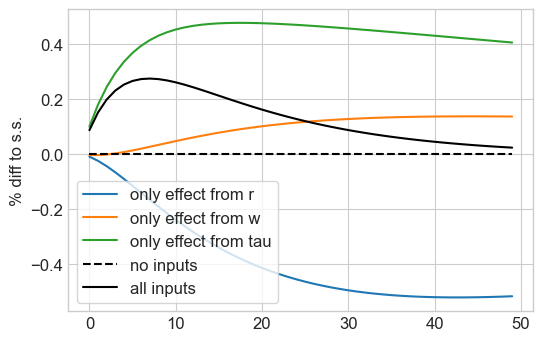

In [89]:
T_max = 50

fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
    
i_color = 0
for use_inputs in [['r'],['w'],['tau'],None,'all']:
    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=True,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'only effect from {use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.A_hh[0,:50]/ss.A_hh-1)*100,ls=ls,color=color,label=label);

ax.set_ylabel('% diff to s.s.')
ax.legend(frameon=True);